First we load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel("datasetmtf.xlsx")
data.head()

,Year,Cause of Death,State,Deaths
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Alabama,3292
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Alaska,362
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Arizona,3910
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Arkansas,2006
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",California,16672


Now we begin the problems! The code for each problem is listed below

In [3]:
# Problem 10
grouped = data[['Cause of Death', 'Deaths', "Year"]].groupby(["Cause of Death", "Year"])
top_ten = grouped.sum().unstack(level="Cause of Death").mean().nlargest(10)
leading_causes = top_ten.droplevel(level=0).index
total_deaths = grouped.sum().unstack(level="Cause of Death").sum().droplevel(level=0)[leading_causes]
total_deaths

Cause of Death
Diseases of heart (I00-I09,I11,I13,I20-I51)                              28799344.0
Malignant neoplasms (C00-C97)                                            22999590.0
COVID-19 (U07.1)                                                           274225.0
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                      5798935.0
Chronic lower respiratory diseases (J40-J47)                              5618924.0
Cerebrovascular diseases (I60-I69)                                        5356306.0
Influenza and pneumonia (J09-J18)                                         3159813.0
Alzheimer's disease (G30)                                                 2203133.0
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)     1608044.0
Transport accidents (V01-V99,Y85)                                         1573469.0
dtype: float64

In [4]:
# Problem 11
grouped = data[['Cause of Death', 'Deaths', "Year"]].groupby(["Cause of Death", "Year"])
top_ten = grouped.sum().unstack(level="Cause of Death").sum().nlargest(10)
leading_causes = top_ten.droplevel(level=0).index
total_deaths = grouped.sum().unstack(level="Cause of Death").sum().droplevel(level=0)[leading_causes]
total_deaths

Cause of Death
Diseases of heart (I00-I09,I11,I13,I20-I51)                              28799344.0
Malignant neoplasms (C00-C97)                                            22999590.0
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                      5798935.0
Chronic lower respiratory diseases (J40-J47)                              5618924.0
Cerebrovascular diseases (I60-I69)                                        5356306.0
Influenza and pneumonia (J09-J18)                                         3159813.0
Alzheimer's disease (G30)                                                 2203133.0
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)     1608044.0
Transport accidents (V01-V99,Y85)                                         1573469.0
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                      1507728.0
dtype: float64

In [5]:
# Problem 12
year_only = data[data["Year"] == 2015]
cases = year_only["Cause of Death"].value_counts()["Influenza and pneumonia (J09-J18)"]
total = year_only["Cause of Death"].count()
print(f"{cases}/{total}")

51/1431


In [6]:
# Problem 13
filtered = data[(data["State"] == "New York") & (data["Cause of Death"] == "Chronic lower respiratory diseases (J40-J47)")]
counts = filtered["Year"].value_counts()
print(f"{counts.iloc[0]}/{counts.sum()}")
print(counts.index)

1/22
Int64Index([2015, 2014, 2017, 2018, 2019, 2020, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2016],
           dtype='int64')


In [7]:
# Problem 14
cases = data["Cause of Death"].value_counts()['Malignant neoplasms (C00-C97)']
total = data["Cause of Death"].value_counts().sum()
print(f"{cases} / {total}")

1122 / 31108


In [8]:
# Problem 15
# No code

1439
13
Influenza and pneumonia (J09-J18)                                                                    51
Diseases of heart (I00-I09,I11,I13,I20-I51)                                                          51
Chronic lower respiratory diseases (J40-J47)                                                         51
Diabetes mellitus (E10-E14)                                                                          51
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                                                 51
Heart failure (I50)                                                                                  51
Cerebrovascular diseases (I60-I69)                                                                   51
Alzheimer's disease (G30)                                                                            51
Chronic liver disease (K35-K74)                                                                      51
Accidents (unintentional injuries) (V01-X59,Y85-Y86)    

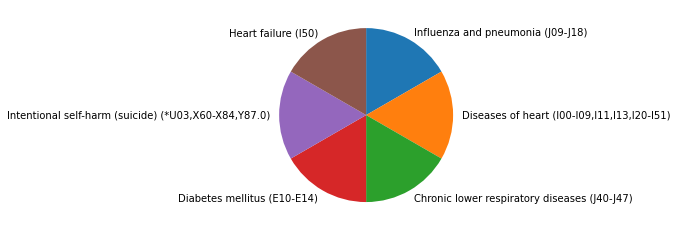

In [9]:
# Problem 16  ????????????//
counts = data[data["Year"] == 2016]["Cause of Death"].value_counts()
plt.pie(counts[:6], labels = counts.index[:6], startangle = 90, counterclock = False);
print(counts.sum())
print((counts == counts.max()).sum())
print(counts[counts == counts.max()])

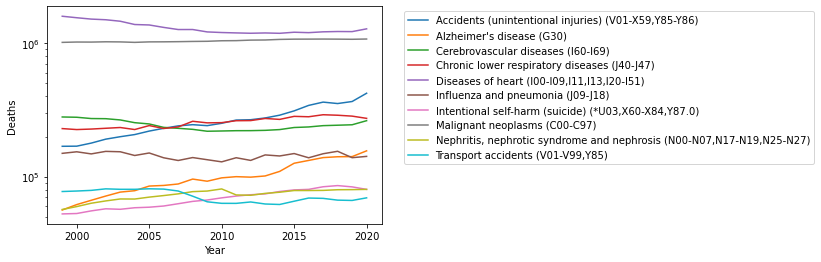

In [94]:
# Problem 17
grouped = data[['Cause of Death', 'Deaths', "Year"]].groupby(["Cause of Death", "Year"]).sum()
top_ten = grouped.unstack(level="Cause of Death").sum().nlargest(10)
leading_causes = top_ten.droplevel(level=0).index
use = grouped.loc[leading_causes].droplevel(level = 1).groupby("Cause of Death")

for x, y in use:
    plt.plot(1999+np.arange(len(y)), y, label = str(x))
    
plt.yscale('log')
plt.legend(bbox_to_anchor =(1.05, 1.0))
plt.xlabel("Year")
plt.ylabel("Deaths");

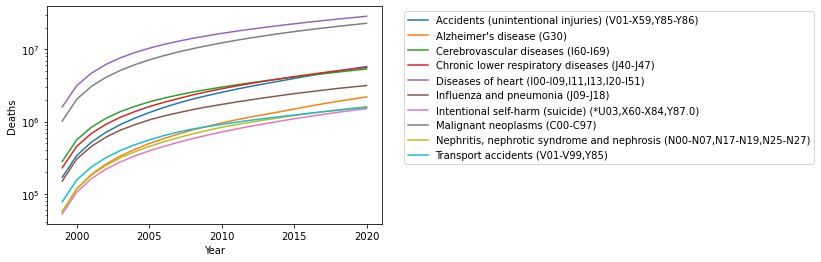

In [119]:
# Problem 17
grouped = data[['Cause of Death', 'Deaths', "Year"]].groupby(["Cause of Death", "Year"])
top_ten = grouped.sum().unstack(level="Cause of Death").sum().nlargest(10)
leading_causes = top_ten.droplevel(level=0).index
total_deaths = grouped.sum().unstack(level="Cause of Death").sum().droplevel(level=0)[leading_causes]
csum = grouped.sum().loc[total_deaths.index].droplevel(level='Year').groupby("Cause of Death").apply(lambda j: j.cumsum())
for x, y in csum.groupby("Cause of Death"):
    plt.plot(1999 + np.arange(len(y)), y, label = str(x))

plt.yscale('log')
plt.legend(bbox_to_anchor =(1.05, 1.0))
plt.xlabel("Year")
plt.ylabel("Deaths");

In [120]:
# Problem 18 
totals = data.groupby("Year").sum()
totals.reset_index(inplace = True)
totals["Year"] -= 1999

0.20114050402330408
[[15804.22303783]] [3758368.24901186]


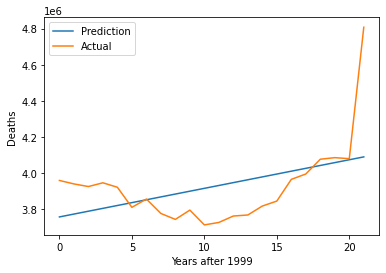

In [121]:
x = np.array(totals['Year']).reshape(-1, 1)
y = np.array(totals['Deaths']).reshape(-1, 1)

model = LinearRegression().fit(x, y)

print(model.score(x, y))
print(model.coef_, model.intercept_)

plt.plot(x, model.predict(x), label = "Prediction")
plt.plot(x, y, label = "Actual")
plt.xlabel("Years after 1999")
plt.ylabel("Deaths")
plt.legend();

In [122]:
# Problem 19 
totals2 = data[data["Cause of Death"] == "Heart failure (I50)"].groupby("Year").sum()
totals2.reset_index(inplace = True)
totals2["Year"] -= 1999

0.7521848501533823
[[1184.79785432]] [3758368.24901186]


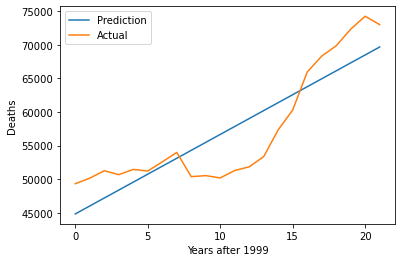

In [123]:
x2 = np.array(totals2['Year']).reshape(-1, 1)
y2 = np.array(totals2['Deaths']).reshape(-1, 1)

model2 = LinearRegression().fit(x2, y2)

print(model2.score(x2, y2))
print(model2.coef_, model.intercept_)

plt.plot(x2, model2.predict(x2), label = "Prediction")
plt.plot(x2, y2, label = "Actual")
plt.xlabel("Years after 1999")
plt.ylabel("Deaths")
plt.legend();

In [124]:
# Problem 20 
model2.predict(np.array([[2025-1999]]))

array([[75618.68492377]])

In [125]:
# Problem 21
model.predict(np.array([[2025-1999]]))

array([[4169278.04799548]])

In [127]:
# Problem 22
totals3 = data[data["Cause of Death"] == "Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)"].groupby("Year").sum()
totals3.reset_index(inplace = True)
totals3["Year"] -= 1999

In [130]:
x3 = np.array(totals3['Year']).reshape(-1, 1)
y3 = np.array(totals3['Deaths']).reshape(-1, 1)

model3 = LinearRegression().fit(x3, y3)
model3.predict(np.array([[2025-1999]]))

array([[94419.31620553]])